<a href="https://colab.research.google.com/github/Fenilsavani-and/Portfolio_Optimization/blob/main/MVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import cvxpy as cp
from scipy.optimize import minimize


In [ ]:
df = pd.read_csv('Data_pctg.csv')

In [ ]:
# data is already preprocessed with log(n) value:

In [ ]:
df = pd.read_csv('Data_pctg.csv', index_col='Date')
df = df

In [ ]:
df

,SMCI,DECK,RS,CSL,GDDY,VST,GGG,MANH,LII,WSM,SAIA,LECO,RPM,XPO
Date,,,,,,,,,,,,,,
2019-01-03,0.039735,-0.028044,-0.025039,-0.019115,-0.041229,-0.009383,-0.030799,-0.023702,-0.017952,-0.006578,-0.009901,-0.028995,-0.048544,-0.040243
2019-01-04,-0.008917,-0.031953,0.041320,0.020194,0.039349,0.040595,0.032026,0.034232,0.034676,0.014446,0.019815,0.036438,-0.047741,0.028737
2019-01-07,0.008997,0.027178,-0.002480,0.000000,0.016773,0.016905,0.000481,0.017606,-0.002823,0.026503,-0.003450,0.004569,0.010524,0.039705
2019-01-08,-0.006369,0.007354,0.037845,0.015340,-0.008798,0.000426,0.017793,0.031142,0.013425,0.026975,0.026057,0.020720,0.035789,0.017911
2019-01-09,-0.004487,0.004761,0.004525,0.013842,0.006499,-0.006817,0.009213,0.011857,0.012481,0.004503,0.014740,0.013492,0.010603,0.029880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.047538,-0.014827,0.013154,0.004474,-0.009261,0.006086,0.008053,0.001683,0.000631,-0.005812,0.002618,0.008312,0.005643,0.001903
2023-12-26,0.015912,-0.008231,0.000248,0.006826,0.005760,0.004734,0.005442,-0.003996,0.005113,-0.003930,0.013301,0.006778,0.003830,0.006815
2023-12-27,0.002276,-0.000320,0.000566,-0.000891,0.000657,0.004712,0.001152,-0.013132,0.006118,0.003107,-0.013585,0.002820,-0.000621,-0.002219


In [ ]:
# 1) First MVO model with formula (4.13) equation risky and risk-free assets:

def mean_variance_opt(mu, cv, Er):
    n = len(mu)
    I = np.ones((n, 1))
    A = np.dot(np.dot(I.T, np.linalg.inv(cv)), mu)       # A,B,C,D > 0
    B = np.dot(np.dot(mu.T, np.linalg.inv(cv)), mu)
    C = np.dot(np.dot(I.T, np.linalg.inv(cv)), I)
    D = B * C - A**2
    lam = (C * Er - A) / D
    gam = (B - A * Er) / D
    wts = lam[0] * np.dot(np.linalg.inv(cv), mu) + gam[0] * np.dot(np.linalg.inv(cv), I) # First Equation.
    g = (B * np.dot(np.linalg.inv(cv), I) - A * np.dot(np.linalg.inv(cv), mu)) / D
    h = (C * np.dot(np.linalg.inv(cv), mu) - A * np.dot(np.linalg.inv(cv), I)) / D
    wts = g + h * Er   #Second Equation.
    return wts


# Example usage:
mu = np.round(df.mean().values.flatten()* 100, 4).reshape(-1, 1)   # Mean Return of last 5 years. ans is ex: 0.23
# Expected returns of assets
cv = df.cov().to_numpy()  # Covariance matrix
Er = 0.15  # Target expected return

weights = mean_variance_opt(mu, cv, Er)
print("Optimal weights:", weights)



Optimal weights: [[ 0.14001633]
 [ 0.08197483]
 [ 0.178299  ]
 [ 0.10087654]
 [ 0.00916674]
 [ 0.11393335]
 [-0.04380577]
 [ 0.05734808]
 [ 0.08422184]
 [ 0.02527823]
 [ 0.11686465]
 [ 0.18606394]
 [ 0.04472674]
 [-0.09496449]]


In [ ]:
print("Standard Deviation of portfolio:", np.sqrt(np.dot(np.dot(weights.T, cv),weights)))

Standard Deviation of portfolio: [[0.01653438]]


In [ ]:
print("Portfolio Expected Returns E(r):", np.dot(weights.T, mu))

Portfolio Expected Returns E(r): [[0.15]]


In [ ]:
# 1.1) MVO Model with Tangency Portfolio Method:

def mean_variance_Tangency(mu, cv, Er, rf):
    global A, B, C, D, H, I, wts
    n = len(mu)
    I = np.ones((n, 1))
    A = np.dot(np.dot(I.T, np.linalg.inv(cv)), mu)       # A,B,C,D > 0
    B = np.dot(np.dot(mu.T, np.linalg.inv(cv)), mu)
    C = np.dot(np.dot(I.T, np.linalg.inv(cv)), I)
    D = B * C - A**2
    H = ((B) - 2*(A)*(rf)) + ((C)*(rf**2))


    wts = (1/(A - C*rf))*(np.dot(np.linalg.inv(cv),(mu - rf*I)))
    return wts


# Example usage:
mu = np.round(df.mean().values.flatten()*100, 4).reshape(-1, 1)   # Mean Return of last 5 years. ans is ex: 0.23
# Expected returns of assets
cv = df.cov().to_numpy()  # Covariance matrix
Er = 0.15  # Target expected return
rf = 4 # Risk Free return based on Bond yield 10 year.
weights = mean_variance_Tangency(mu, cv, Er, rf)
print("Optimal weights:", weights)



Optimal weights: [[-0.01519032]
 [ 0.0192848 ]
 [ 0.05325958]
 [ 0.06955675]
 [ 0.17379223]
 [ 0.14010349]
 [ 0.14786053]
 [-0.05843659]
 [ 0.20427826]
 [-0.04085716]
 [-0.03356886]
 [ 0.2225845 ]
 [ 0.2257243 ]
 [-0.1083915 ]]


In [ ]:
print("Portfolio Expected Returns E(r):", rf + (H/(A-C*rf)))

Portfolio Expected Returns E(r): [[0.0650449]]


In [ ]:
print("Standard Deviation of portfolio:", np.sqrt(np.dot(np.dot(weights.T, cv),weights)))

Standard Deviation of portfolio: [[0.01429041]]


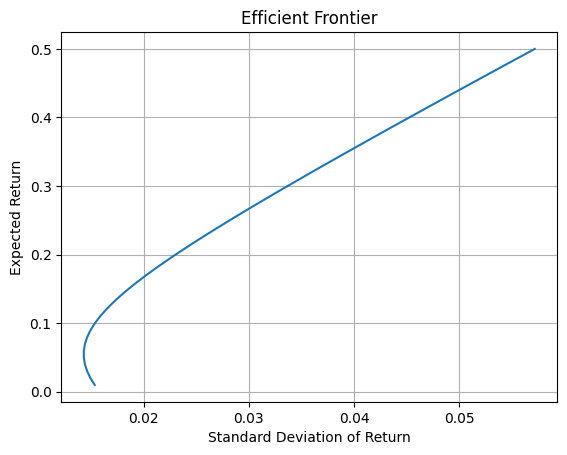

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as px


Er_vec = np.linspace(0.01, 0.5, 50)  # Expected returns numbers
Sig_vec = np.zeros((50, 1))          # Deviation based on Expected returns
j = 0
for Er in Er_vec:
  j += 1

  weights = mean_variance_opt(mu, cv, Er)
  Sig_vec[j - 1] = np.sqrt(np.dot(np.dot(weights.T, cv), weights))

plt.plot(Sig_vec, Er_vec)
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


In [ ]:
def mean_variance_optimization(returns_df):
    # Calculate expected returns
    expected_returns = returns_df.mean()

    # Calculate the covariance matrix
    cov_matrix = returns_df.cov()

    # Define the variables for optimization (portfolio weights)
    num_assets = len(expected_returns)
    weights = cp.Variable(num_assets)

    # Define the objective function (minimize portfolio variance)
    portfolio_variance = cp.quad_form(weights, cov_matrix)
    objective = cp.Minimize(portfolio_variance)

    # Define the constraints (fully invested portfolio)
    constraints = [cp.sum(weights) == 1, weights >= 0]

    # Solve the optimization problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Retrieve optimal weights
    optimal_weights = weights.value

    return optimal_weights


In [ ]:
optimal_weights = mean_variance_optimization(returns_df)

print("Optimal weights for the portfolio:")
for i, weight in enumerate(optimal_weights):
    print(f" {df.columns[i]} {i+1}: {weight}")


Optimal weights for the portfolio:
 SMCI 1: -5.167144523266714e-20
 DECK 2: 2.559651741246661e-19
 RS 3: 0.04314759281372282
 CSL 4: 0.05857437600878532
 GDDY 5: 0.12346755526361025
 VST 6: 0.1402709459784903
 GGG 7: 0.15114083107227258
 MANH 8: 7.479103762288194e-20
 LII 9: 0.16467225321048415
 WSM 10: -1.1106501108489113e-19
 SAIA 11: -2.892823986124785e-19
 LECO 12: 0.1570311978318061
 RPM 13: 0.16169524782082836
 XPO 14: -4.040140599740143e-19


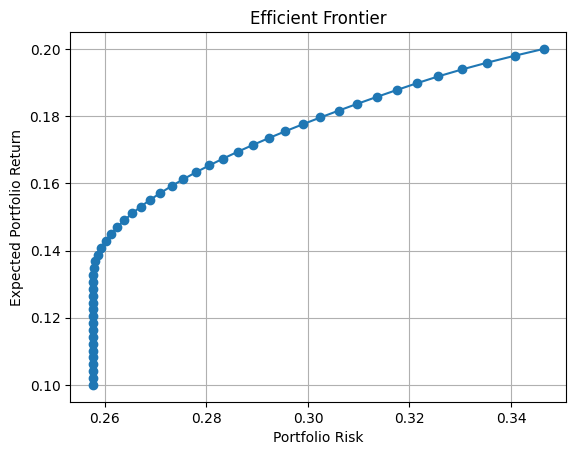

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Define expected returns of assets (A) and covariance matrix (B)
# Example data (replace with your actual data)
A = np.array([0.1, 0.2, 0.15])  # Expected returns of assets
B = np.array([[0.1, 0.05, 0.03], [0.05, 0.12, 0.07], [0.03, 0.07, 0.11]])  # Covariance matrix

# Number of assets
n_assets = len(A)

# Set up quadratic programming problem for mean-variance optimization
x = cp.Variable(n_assets)  # Asset weights
target_returns = np.linspace(min(A), max(A), 50)  # Example: 50 target returns
portfolios = []

for target_return in target_returns:
    # Objective function: Minimize portfolio risk
    objective = cp.Minimize(cp.quad_form(x, B))

    # Constraints
    constraints = [cp.sum(x) == 1, A @ x >= target_return, x >= 0]

    # Define optimization problem
    problem = cp.Problem(objective, constraints)

    # Solve optimization problem
    problem.solve()

    # Store results
    portfolios.append((x.value, cp.sqrt(objective.value)))

# Extract portfolio risk and return
port_risk = [portfolio[1].value for portfolio in portfolios]
port_return = target_returns

# Plot efficient frontier
plt.figure()
plt.plot(port_risk, port_return, '-o')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Expected Portfolio Return')
plt.grid(True)
plt.show()
